In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
shopping_trends = Path("/Users/shauntelphillips/Desktop/SMU Bootcamp/SMU-Project-1/SMU-Project1-ShoppingTrends/shoppint_trends_master_dataset/shopping_trends_updated.csv")


In [3]:
#read in file
trends_df = pd.read_csv(shopping_trends)

In [4]:
trends_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
trends_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
# Count of Subscription Values
trends_df["Subscription Status"].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

In [7]:
# Labels for the sections of our pie chart
labels = ["Yes", "No"]

# The values of each section of the pie chart
sizes = [1058, 2847]

# The colors of each section of the pie chart
colors = ["red", "orange"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0,0)

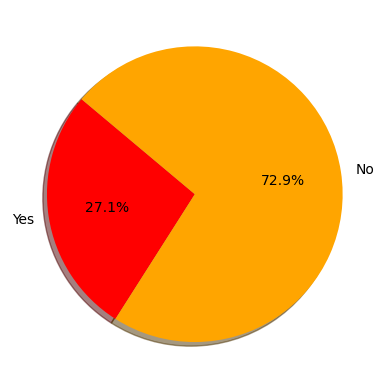

In [8]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [33]:
#Subscriptions by gender 
filtered_data = trends_df[trends_df["Subscription Status"] == "Yes"]
sub_stat_gender = filtered_data.groupby("Gender")["Customer ID"].nunique()
print(sub_stat_gender)

Gender
Male    1053
Name: Customer ID, dtype: int64


In [37]:
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [1058]

# The colors of each section of the pie chart
colors = ["Green",]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0,0)

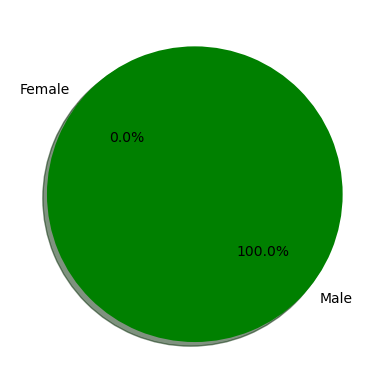

In [36]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [9]:
# Count how many purchases made by season
trends_df["Season"].value_counts()


Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

In [10]:
season_count = [999,975,971,955]
x_axis_1 = np.arange(len(season_count))

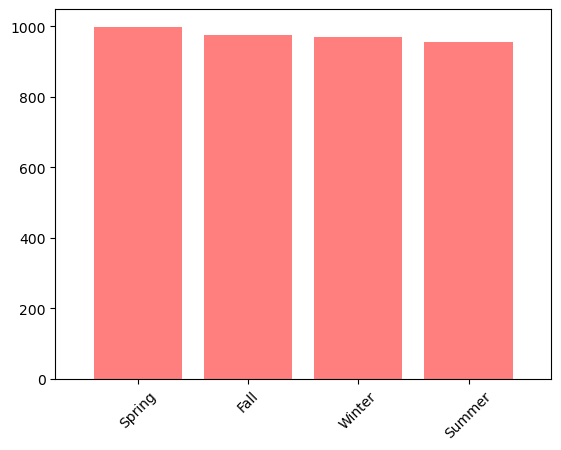

In [11]:
plt.bar(x_axis_1, season_count, color='red', alpha=.5, align="center")
tick_locations = [value for value in x_axis_1]
plt.xticks(tick_locations, ["Spring","Fall","Winter","Summer"],rotation=45)
plt.xlim(-0.75, len(x_axis_1)-0.25)
plt.show()

In [12]:
#how much money was spent in each season 
trends_df.groupby("Season")["Purchase Amount (USD)"].sum()

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64

In [13]:
season_purchase = [60018,58679,55777,58607]
x_axis_2 = np.arange(len(season_purchase))

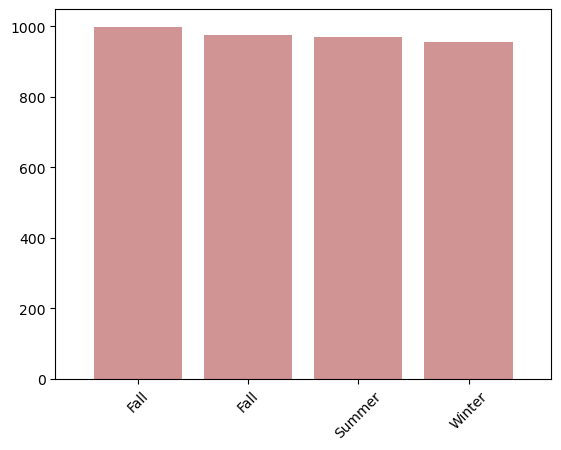

In [14]:
plt.bar(x_axis_2, season_count, color='brown', alpha=.5, align="center")
tick_locations = [value for value in x_axis_1]
plt.xticks(tick_locations, ["Fall","Fall","Summer","Winter"],rotation=45)
plt.xlim(-0.75, len(x_axis_2)-0.25)
plt.show()

In [15]:
#frequency count
frequency_count = trends_df.groupby("Frequency of Purchases")["Customer ID"].nunique()
print(frequency_count)

Frequency of Purchases
Annually          572
Bi-Weekly         547
Every 3 Months    584
Fortnightly       542
Monthly           553
Quarterly         563
Weekly            539
Name: Customer ID, dtype: int64


In [16]:
users = [572, 547, 684,542,553,563,539]
x_axis = np.arange(len(users))

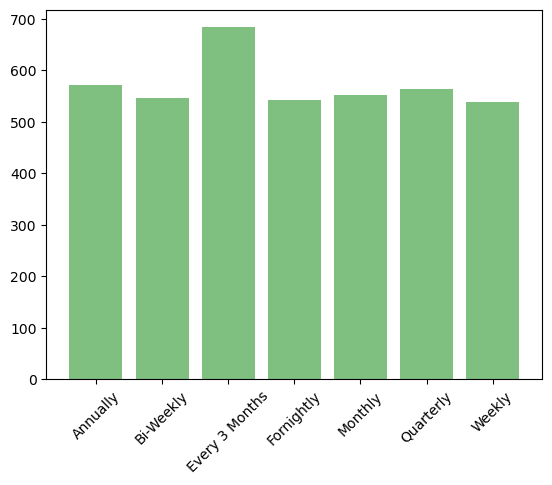

In [17]:
plt.bar(x_axis, users, color='green', alpha=.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Annually", "Bi-Weekly", "Every 3 Months", "Fornightly", "Monthly","Quarterly","Weekly"],rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.show()

In [18]:
#purchase df
Purchase = trends_df['Purchase Amount (USD)']

In [19]:
Purchase.describe()

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64

In [20]:
mean_numpy = np.mean(Purchase)
print(mean_numpy)

median_numpy = np.median(Purchase)
print(median_numpy)

59.76435897435898
60.0


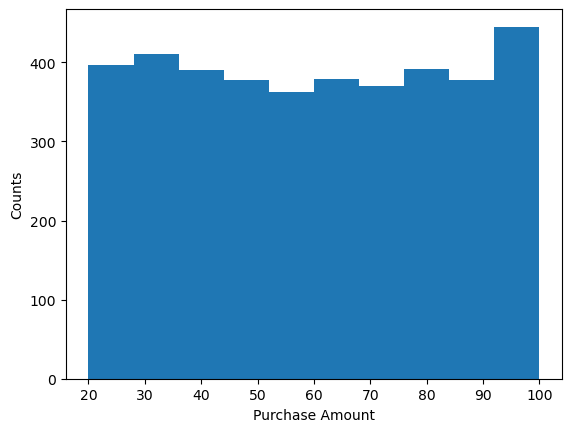

NormaltestResult(statistic=1096.904178845997, pvalue=6.460765457050643e-239)


In [21]:
plt.hist(Purchase)
plt.xlabel('Purchase Amount')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(Purchase.sample(1000)))

In [22]:
# Run the normality test .
print(st.normaltest(Purchase.sample(2500)))

NormaltestResult(statistic=3037.4158662868053, pvalue=0.0)


In [23]:
sd_numpy = np.std(Purchase,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population standard deviation using the NumPy module is 23.68235546744711


In [24]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

Roughly 68% of the data is between 36.082 and 83.447
Roughly 95% of the data is between 12.4 and 107.129
Roughly 99.7% of the data is between -11.283 and 130.811


In [25]:
Ratings = trends_df['Review Rating']
Ratings.describe()

count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review Rating, dtype: float64

In [30]:
Ratings.median()

3.7

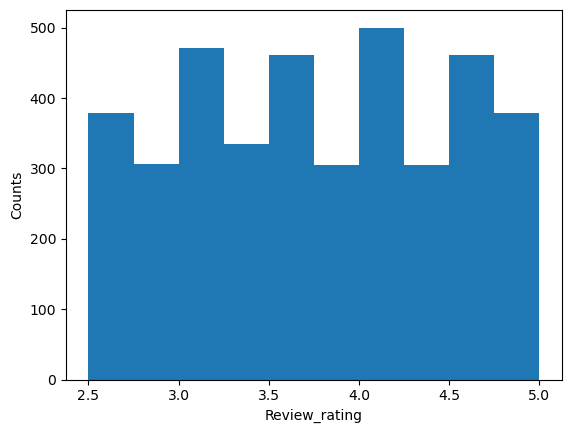

NormaltestResult(statistic=3395.3526209856773, pvalue=0.0)


In [32]:
plt.hist(Ratings)
plt.xlabel('Review_rating')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(Purchase.sample(2500)))

In [28]:
sd_numpy_2 = np.std(Ratings,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy_2}")

The population standard deviation using the NumPy module is 0.7161309846066888


In [29]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy_2-sd_numpy_2,3)} and {round(mean_numpy_2+sd_numpy_2,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy_2*sd_numpy_2,3)} and {round(mean_numpy_2+2*sd_numpy_2,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy_2-3*sd_numpy_2,3)} and {round(mean_numpy_2+3*sd_numpy_2,3)}")

Roughly 68% of the data is between 3.034 and 4.466
Roughly 95% of the data is between 2.685 and 5.182
Roughly 99.7% of the data is between 1.602 and 5.898
